In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

data_dir = '../data/'
nn_data_dir = '../data/nn_data/'

In [3]:
df = pd.read_csv(data_dir + 'openaq_merra2_dropna.csv')
df

,openaq_pm25,openaq_time,parameter,units,site_id,site_name,lat,lon,DUEXTTAU,SSSMASS25,...,Q500,T10M,Q850,V2M,V10M,T850,U10M,QV2M,QV10M,PBLH
0,31.0,2019-10-28 18:59:59,pm25,µg/m³,8839,Baghdad Airnow,33.3128,44.3615,0.126073,1.429726e-09,...,0.000599,294.997040,0.007774,0.540911,1.267893,285.016174,-1.380577,0.008615,0.008593,103.362801
1,44.0,2019-10-28 20:59:59,pm25,µg/m³,8839,Baghdad Airnow,33.3128,44.3615,0.122747,1.508852e-09,...,0.000338,293.673523,0.007294,0.649250,1.517674,285.104523,-1.187964,0.008766,0.008760,65.157997
2,27.0,2019-10-28 21:59:59,pm25,µg/m³,8839,Baghdad Airnow,33.3128,44.3615,0.120642,1.512490e-09,...,0.000241,293.124237,0.006970,0.599674,1.396908,285.223206,-1.256243,0.008892,0.008886,65.026810
3,20.0,2019-10-28 23:59:59,pm25,µg/m³,8839,Baghdad Airnow,33.3128,44.3615,0.117869,1.527496e-09,...,0.000234,292.179321,0.006365,0.467283,1.087632,285.518616,-1.540468,0.009197,0.009151,64.812714
4,15.0,2019-10-29 00:59:59,pm25,µg/m³,8839,Baghdad Airnow,33.3128,44.3615,0.117735,1.501121e-09,...,0.000227,291.771790,0.006159,0.438826,1.023955,285.631927,-1.615325,0.009353,0.009303,64.731140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303514,7.0,2024-08-31 19:59:59,pm25,µg/m³,8881,Uzbekistan,41.3672,69.2725,0.075855,1.253397e-10,...,0.000185,294.898224,0.004684,-0.385406,-0.840388,292.366333,-1.672649,0.004759,0.004759,90.612373
303515,8.0,2024-08-31 20:59:59,pm25,µg/m³,8881,Uzbekistan,41.3672,69.2725,0.067616,1.339799e-10,...,0.000234,294.655670,0.004707,-0.354869,-0.739873,291.882599,-1.459667,0.004782,0.004782,153.561401
303516,8.0,2024-08-31 21:59:59,pm25,µg/m³,8881,Uzbekistan,41.3672,69.2725,0.059099,1.411991e-10,...,0.000281,294.347656,0.004721,-0.439029,-0.874943,291.571838,-1.334082,0.004801,0.004801,163.961914
303517,7.0,2024-08-31 22:59:59,pm25,µg/m³,8881,Uzbekistan,41.3672,69.2725,0.051028,1.468834e-10,...,0.000300,294.054321,0.004738,-0.557936,-1.089334,291.454865,-1.265444,0.004816,0.004816,259.934357


# Removing Multicollinearity

In [3]:
df.columns

Index(['openaq_pm25', 'openaq_time', 'parameter', 'units', 'site_id',
       'site_name', 'lat', 'lon', 'DUEXTTAU', 'SSSMASS25', 'SSSMASS',
       'OCSMASS', 'BCSMASS', 'SSEXTTAU', 'TOTEXTTAU', 'BCEXTTAU', 'SUEXTTAU',
       'OCEXTTAU', 'SO4SMASS', 'DUSMASS', 'DUSMASS25', 'U2M', 'T500', 'PS',
       'Q500', 'T10M', 'Q850', 'V2M', 'V10M', 'T850', 'U10M', 'QV2M', 'QV10M',
       'PBLH'],
      dtype='object')

In [13]:
other_features = ['openaq_pm25', 'openaq_time', 'parameter', 'units', 'site_id', 'site_name', 'lat', 'lon']

In [14]:
features = df.drop(other_features, axis=1)
features

,DUEXTTAU,SSSMASS25,SSSMASS,OCSMASS,BCSMASS,SSEXTTAU,TOTEXTTAU,BCEXTTAU,SUEXTTAU,OCEXTTAU,...,Q500,T10M,Q850,V2M,V10M,T850,U10M,QV2M,QV10M,PBLH
0,0.126073,1.429726e-09,5.351467e-09,3.163245e-09,2.020898e-09,0.008144,0.426803,0.019652,0.251693,0.021325,...,0.000599,294.997040,0.007774,0.540911,1.267893,285.016174,-1.380577,0.008615,0.008593,103.362801
1,0.122747,1.508852e-09,5.791662e-09,3.317858e-09,2.313763e-09,0.007917,0.406415,0.019223,0.236378,0.020149,...,0.000338,293.673523,0.007294,0.649250,1.517674,285.104523,-1.187964,0.008766,0.008760,65.157997
2,0.120642,1.512490e-09,5.928086e-09,3.361499e-09,2.416527e-09,0.007769,0.393258,0.018845,0.226432,0.019522,...,0.000241,293.124237,0.006970,0.599674,1.396908,285.223206,-1.256243,0.008892,0.008886,65.026810
3,0.117869,1.527496e-09,6.206392e-09,3.405203e-09,2.480193e-09,0.007383,0.367618,0.017699,0.206367,0.018270,...,0.000234,292.179321,0.006365,0.467283,1.087632,285.518616,-1.540468,0.009197,0.009151,64.812714
4,0.117735,1.501121e-09,6.260962e-09,3.333298e-09,2.429260e-09,0.007303,0.359478,0.017112,0.199644,0.017733,...,0.000227,291.771790,0.006159,0.438826,1.023955,285.631927,-1.615325,0.009353,0.009303,64.731140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303514,0.075855,1.253397e-10,3.760761e-10,1.492945e-09,1.799678e-10,0.001118,0.144343,0.006756,0.046716,0.013914,...,0.000185,294.898224,0.004684,-0.385406,-0.840388,292.366333,-1.672649,0.004759,0.004759,90.612373
303515,0.067616,1.339799e-10,4.026788e-10,1.543898e-09,1.863947e-10,0.001032,0.134482,0.006448,0.045798,0.013558,...,0.000234,294.655670,0.004707,-0.354869,-0.739873,291.882599,-1.459667,0.004782,0.004782,153.561401
303516,0.059099,1.411991e-10,4.242793e-10,1.603029e-09,1.929955e-10,0.000930,0.123381,0.006206,0.044007,0.013124,...,0.000281,294.347656,0.004721,-0.439029,-0.874943,291.571838,-1.334082,0.004801,0.004801,163.961914
303517,0.051028,1.468834e-10,4.401954e-10,1.657658e-09,1.988664e-10,0.000820,0.112261,0.006061,0.041682,0.012666,...,0.000300,294.054321,0.004738,-0.557936,-1.089334,291.454865,-1.265444,0.004816,0.004816,259.934357


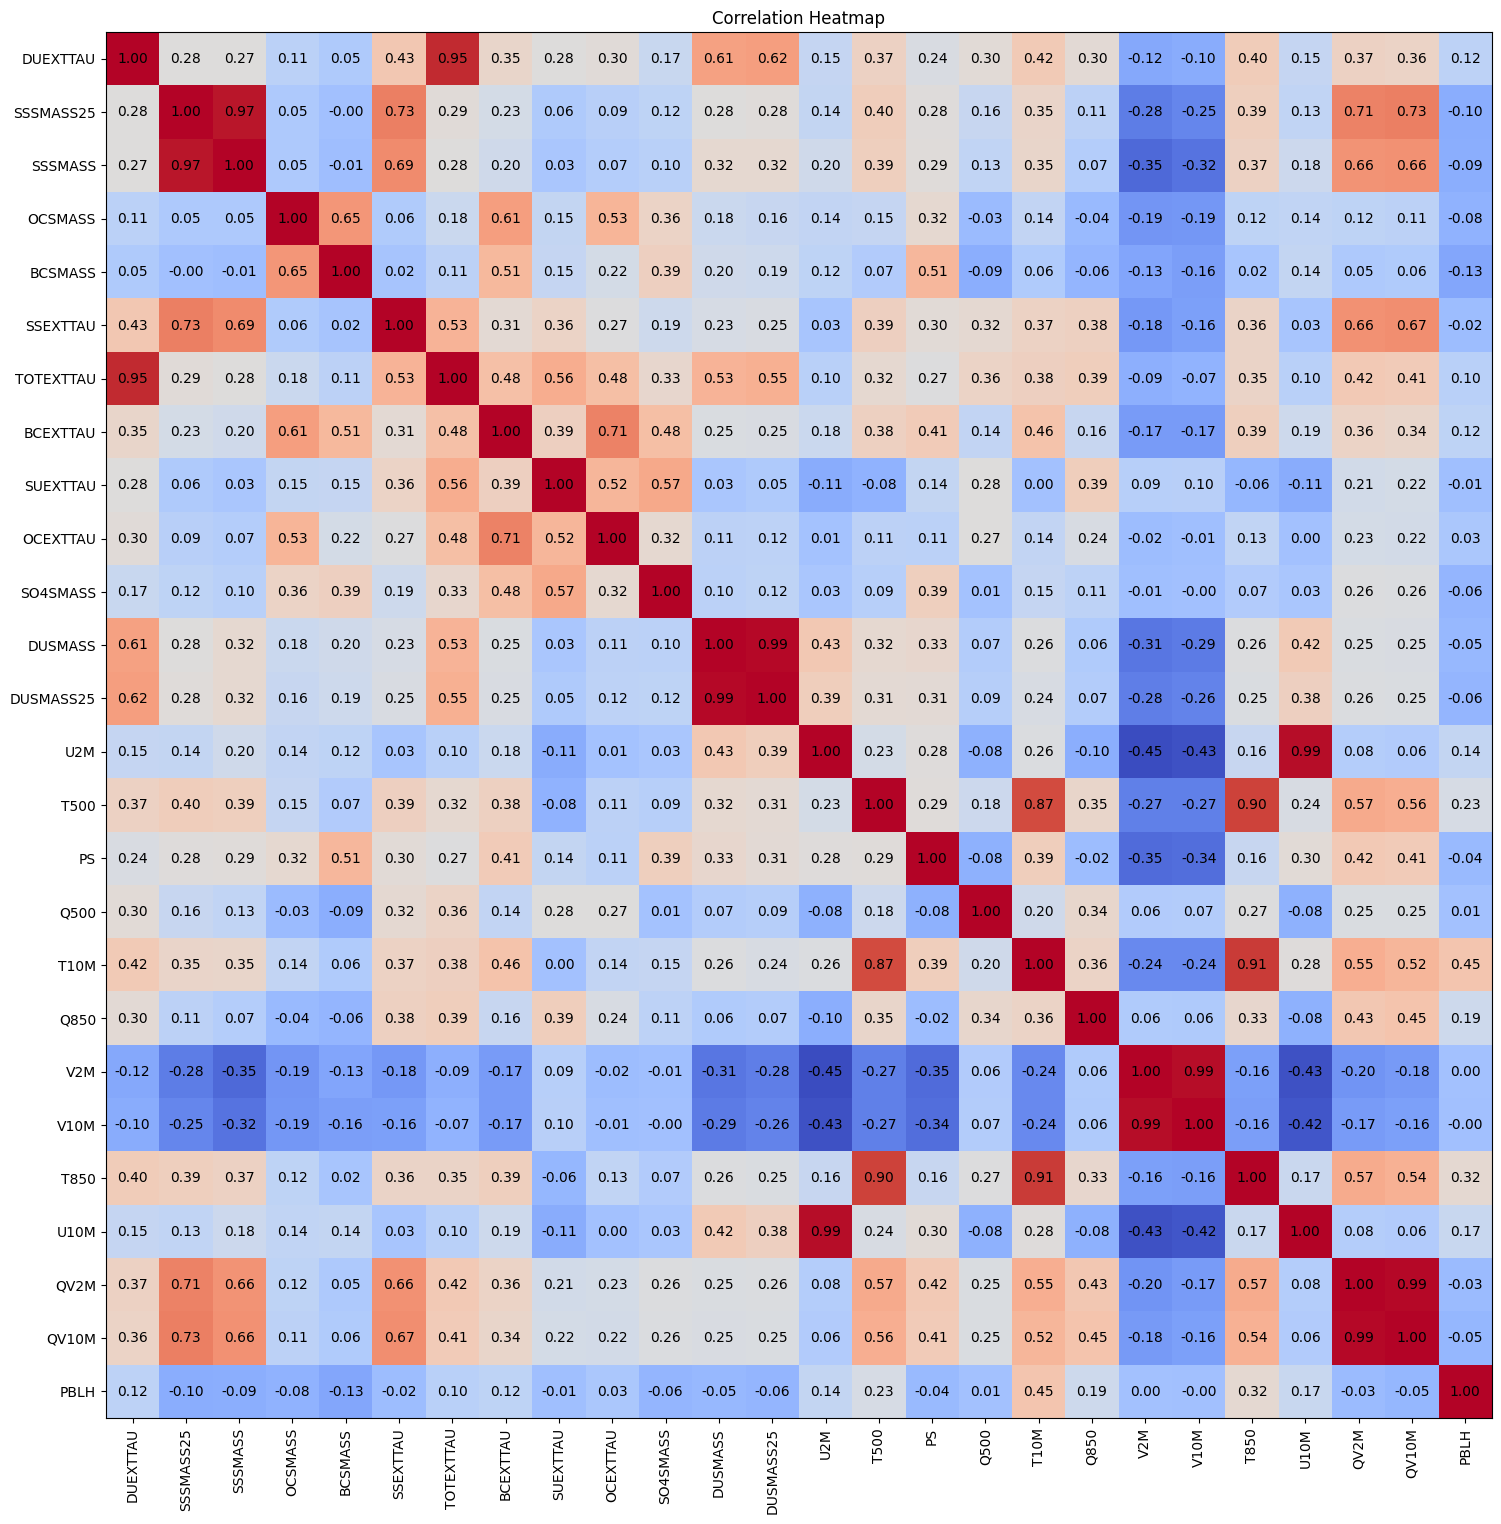

In [15]:
correlations = features.corr()
plt.figure(figsize=(18, 18))
plt.imshow(correlations, cmap='coolwarm', interpolation='none')
plt.xticks(range(len(correlations.columns)), correlations.columns, rotation=90)
plt.yticks(range(len(correlations.columns)), correlations.columns)
plt.title('Correlation Heatmap')

# Show the actual correlation values on the heatmap
for i in range(len(correlations.columns)):
    for j in range(len(correlations.columns)):
        plt.text(j, i, f'{correlations.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

In [16]:
removed = ['U10M', 'V10M', 'QV10M', 'T500', 'T850', 'DUEXTTAU', 'DUSMASS', 'SSSMASS']
removed_df = df.drop(removed, axis=1)
removed_df

,openaq_pm25,openaq_time,parameter,units,site_id,site_name,lat,lon,SSSMASS25,OCSMASS,...,SO4SMASS,DUSMASS25,U2M,PS,Q500,T10M,Q850,V2M,QV2M,PBLH
0,31.0,2019-10-28 18:59:59,pm25,µg/m³,8839,Baghdad Airnow,33.3128,44.3615,1.429726e-09,3.163245e-09,...,1.433731e-08,2.785237e-08,-0.549199,100863.953125,0.000599,294.997040,0.007774,0.540911,0.008615,103.362801
1,44.0,2019-10-28 20:59:59,pm25,µg/m³,8839,Baghdad Airnow,33.3128,44.3615,1.508852e-09,3.317858e-09,...,1.461395e-08,2.981687e-08,-0.479052,100864.289062,0.000338,293.673523,0.007294,0.649250,0.008766,65.157997
2,27.0,2019-10-28 21:59:59,pm25,µg/m³,8839,Baghdad Airnow,33.3128,44.3615,1.512490e-09,3.361499e-09,...,1.445373e-08,3.050081e-08,-0.513265,100850.250000,0.000241,293.124237,0.006970,0.599674,0.008892,65.026810
3,20.0,2019-10-28 23:59:59,pm25,µg/m³,8839,Baghdad Airnow,33.3128,44.3615,1.527496e-09,3.405203e-09,...,1.378086e-08,3.147579e-08,-0.644582,100803.468750,0.000234,292.179321,0.006365,0.467283,0.009197,64.812714
4,15.0,2019-10-29 00:59:59,pm25,µg/m³,8839,Baghdad Airnow,33.3128,44.3615,1.501121e-09,3.333298e-09,...,1.311859e-08,3.151945e-08,-0.677670,100778.273438,0.000227,291.771790,0.006159,0.438826,0.009353,64.731140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303514,7.0,2024-08-31 19:59:59,pm25,µg/m³,8881,Uzbekistan,41.3672,69.2725,1.253397e-10,1.492945e-09,...,2.371119e-09,1.077569e-08,-0.852430,93578.359375,0.000185,294.898224,0.004684,-0.385406,0.004759,90.612373
303515,8.0,2024-08-31 20:59:59,pm25,µg/m³,8881,Uzbekistan,41.3672,69.2725,1.339799e-10,1.543898e-09,...,2.463004e-09,1.173612e-08,-0.784413,93586.679688,0.000234,294.655670,0.004707,-0.354869,0.004782,153.561401
303516,8.0,2024-08-31 21:59:59,pm25,µg/m³,8881,Uzbekistan,41.3672,69.2725,1.411991e-10,1.603029e-09,...,2.540223e-09,1.259832e-08,-0.715564,93608.781250,0.000281,294.347656,0.004721,-0.439029,0.004801,163.961914
303517,7.0,2024-08-31 22:59:59,pm25,µg/m³,8881,Uzbekistan,41.3672,69.2725,1.468834e-10,1.657658e-09,...,2.605719e-09,1.327498e-08,-0.667277,93641.179688,0.000300,294.054321,0.004738,-0.557936,0.004816,259.934357


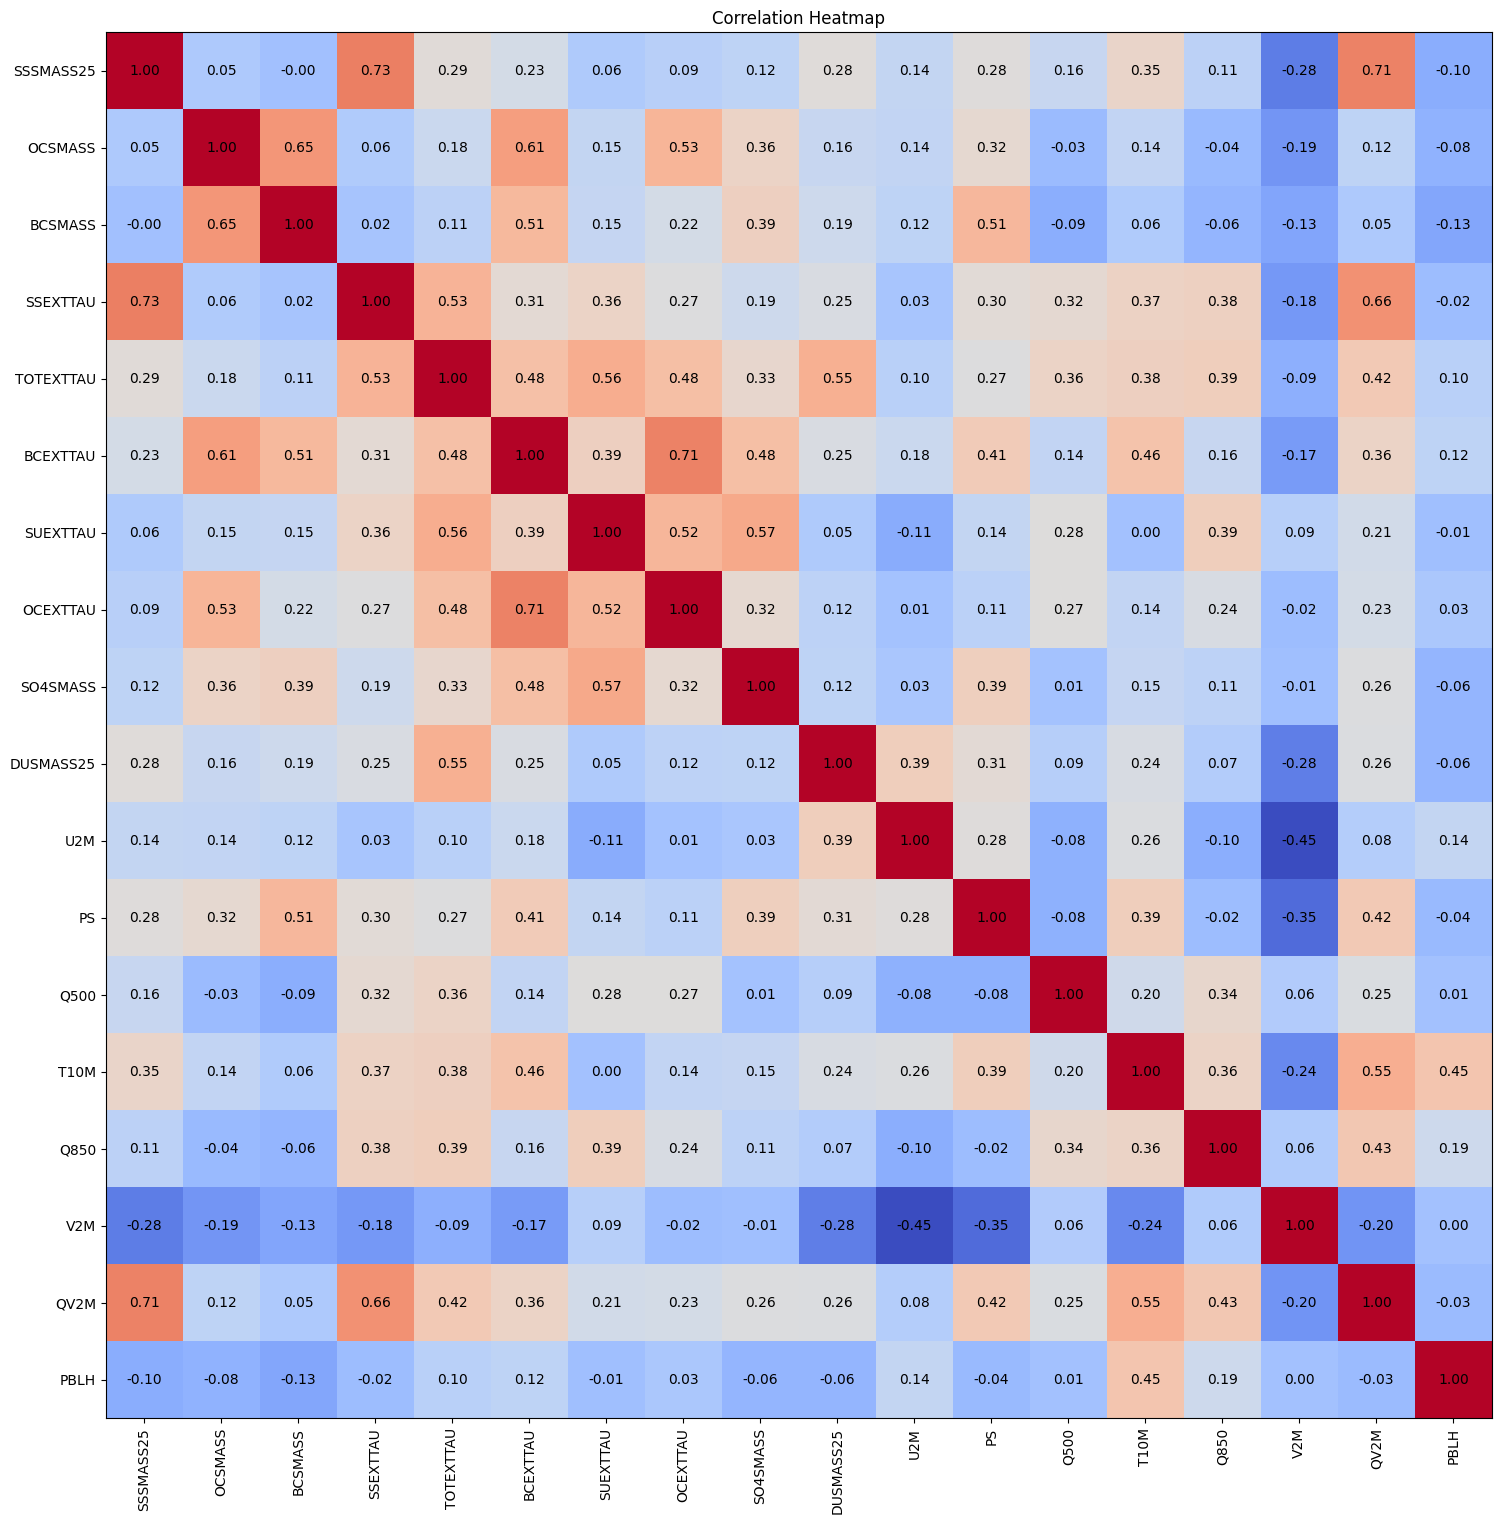

In [18]:
removed_features = removed_df.drop(other_features, axis=1)
correlations = removed_features.corr()
plt.figure(figsize=(18, 18))
plt.imshow(correlations, cmap='coolwarm', interpolation='none')
plt.xticks(range(len(correlations.columns)), correlations.columns, rotation=90)
plt.yticks(range(len(correlations.columns)), correlations.columns)
plt.title('Correlation Heatmap')

# Show the actual correlation values on the heatmap
for i in range(len(correlations.columns)):
    for j in range(len(correlations.columns)):
        plt.text(j, i, f'{correlations.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

In [29]:
months_to_seasons = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                     3: 'Spring', 4: 'Spring', 5: 'Spring',
                     6: 'Summer', 7: 'Summer', 8: 'Summer',
                     9: 'Fall', 10: 'Fall', 11: 'Fall'}

arid_sites = {
    'Baghdad Airnow',
    'Baghdad Embassy',
    'Kuwait',
    'Bahrain',
    'Doha',
    'Dubai'
}

final_df = removed_df.drop(['parameter', 'units', 'site_id', 'lat', 'lon'], axis=1)
final_df['openaq_time'] = pd.to_datetime(final_df['openaq_time'])
final_df['site'] = pd.Categorical(final_df['site_name']).codes
final_df['season'] = final_df['openaq_time'].dt.month.apply(lambda x: months_to_seasons[x])
final_df['season'] = pd.Categorical(final_df['season']).codes
final_df['hour'] = pd.Categorical(final_df['openaq_time'].dt.hour).codes
final_df['day'] = pd.Categorical(final_df['openaq_time'].dt.dayofweek).codes
final_df['month'] = pd.Categorical(final_df['openaq_time'].dt.month).codes
final_df = final_df.drop('openaq_time', axis=1)
final_df['aridity'] = final_df['site_name'].apply(lambda x: 1 if x in arid_sites else 0)
final_df = final_df.drop('site_name', axis=1)
final_df

,openaq_pm25,SSSMASS25,OCSMASS,BCSMASS,SSEXTTAU,TOTEXTTAU,BCEXTTAU,SUEXTTAU,OCEXTTAU,SO4SMASS,...,Q850,V2M,QV2M,PBLH,site,season,hour,day,month,aridity
0,31.0,1.429726e-09,3.163245e-09,2.020898e-09,0.008144,0.426803,0.019652,0.251693,0.021325,1.433731e-08,...,0.007774,0.540911,0.008615,103.362801,0,0,18,0,9,1
1,44.0,1.508852e-09,3.317858e-09,2.313763e-09,0.007917,0.406415,0.019223,0.236378,0.020149,1.461395e-08,...,0.007294,0.649250,0.008766,65.157997,0,0,20,0,9,1
2,27.0,1.512490e-09,3.361499e-09,2.416527e-09,0.007769,0.393258,0.018845,0.226432,0.019522,1.445373e-08,...,0.006970,0.599674,0.008892,65.026810,0,0,21,0,9,1
3,20.0,1.527496e-09,3.405203e-09,2.480193e-09,0.007383,0.367618,0.017699,0.206367,0.018270,1.378086e-08,...,0.006365,0.467283,0.009197,64.812714,0,0,23,0,9,1
4,15.0,1.501121e-09,3.333298e-09,2.429260e-09,0.007303,0.359478,0.017112,0.199644,0.017733,1.311859e-08,...,0.006159,0.438826,0.009353,64.731140,0,0,0,1,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303514,7.0,1.253397e-10,1.492945e-09,1.799678e-10,0.001118,0.144343,0.006756,0.046716,0.013914,2.371119e-09,...,0.004684,-0.385406,0.004759,90.612373,10,2,19,5,7,0
303515,8.0,1.339799e-10,1.543898e-09,1.863947e-10,0.001032,0.134482,0.006448,0.045798,0.013558,2.463004e-09,...,0.004707,-0.354869,0.004782,153.561401,10,2,20,5,7,0
303516,8.0,1.411991e-10,1.603029e-09,1.929955e-10,0.000930,0.123381,0.006206,0.044007,0.013124,2.540223e-09,...,0.004721,-0.439029,0.004801,163.961914,10,2,21,5,7,0
303517,7.0,1.468834e-10,1.657658e-09,1.988664e-10,0.000820,0.112261,0.006061,0.041682,0.012666,2.605719e-09,...,0.004738,-0.557936,0.004816,259.934357,10,2,22,5,7,0


In [31]:
train_data, val_data = train_test_split(final_df, test_size=0.1, random_state=497)
X_train_removed_multicollinearity = train_data.drop('openaq_pm25', axis=1)
y_train_removed_multicollinearity = train_data['openaq_pm25']
X_val_removed_multicollinearity = val_data.drop('openaq_pm25', axis=1)
y_val_removed_multicollinearity = val_data['openaq_pm25']

In [32]:
os.makedirs(nn_data_dir + 'removed_multicollinearity', exist_ok=True)
np.save(nn_data_dir + 'removed_multicollinearity/X_train_removed_multicollinearity.npy', X_train_removed_multicollinearity.to_numpy())
np.save(nn_data_dir + 'removed_multicollinearity/y_train_removed_multicollinearity.npy', y_train_removed_multicollinearity.to_numpy())
np.save(nn_data_dir + 'removed_multicollinearity/X_val_removed_multicollinearity.npy', X_val_removed_multicollinearity.to_numpy())
np.save(nn_data_dir + 'removed_multicollinearity/y_val_removed_multicollinearity.npy', y_val_removed_multicollinearity.to_numpy())

# Summary Statistics

In [4]:
df

,openaq_pm25,openaq_time,parameter,units,site_id,site_name,lat,lon,DUEXTTAU,SSSMASS25,...,Q500,T10M,Q850,V2M,V10M,T850,U10M,QV2M,QV10M,PBLH
0,31.0,2019-10-28 18:59:59,pm25,µg/m³,8839,Baghdad Airnow,33.3128,44.3615,0.126073,1.429726e-09,...,0.000599,294.997040,0.007774,0.540911,1.267893,285.016174,-1.380577,0.008615,0.008593,103.362801
1,44.0,2019-10-28 20:59:59,pm25,µg/m³,8839,Baghdad Airnow,33.3128,44.3615,0.122747,1.508852e-09,...,0.000338,293.673523,0.007294,0.649250,1.517674,285.104523,-1.187964,0.008766,0.008760,65.157997
2,27.0,2019-10-28 21:59:59,pm25,µg/m³,8839,Baghdad Airnow,33.3128,44.3615,0.120642,1.512490e-09,...,0.000241,293.124237,0.006970,0.599674,1.396908,285.223206,-1.256243,0.008892,0.008886,65.026810
3,20.0,2019-10-28 23:59:59,pm25,µg/m³,8839,Baghdad Airnow,33.3128,44.3615,0.117869,1.527496e-09,...,0.000234,292.179321,0.006365,0.467283,1.087632,285.518616,-1.540468,0.009197,0.009151,64.812714
4,15.0,2019-10-29 00:59:59,pm25,µg/m³,8839,Baghdad Airnow,33.3128,44.3615,0.117735,1.501121e-09,...,0.000227,291.771790,0.006159,0.438826,1.023955,285.631927,-1.615325,0.009353,0.009303,64.731140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303514,7.0,2024-08-31 19:59:59,pm25,µg/m³,8881,Uzbekistan,41.3672,69.2725,0.075855,1.253397e-10,...,0.000185,294.898224,0.004684,-0.385406,-0.840388,292.366333,-1.672649,0.004759,0.004759,90.612373
303515,8.0,2024-08-31 20:59:59,pm25,µg/m³,8881,Uzbekistan,41.3672,69.2725,0.067616,1.339799e-10,...,0.000234,294.655670,0.004707,-0.354869,-0.739873,291.882599,-1.459667,0.004782,0.004782,153.561401
303516,8.0,2024-08-31 21:59:59,pm25,µg/m³,8881,Uzbekistan,41.3672,69.2725,0.059099,1.411991e-10,...,0.000281,294.347656,0.004721,-0.439029,-0.874943,291.571838,-1.334082,0.004801,0.004801,163.961914
303517,7.0,2024-08-31 22:59:59,pm25,µg/m³,8881,Uzbekistan,41.3672,69.2725,0.051028,1.468834e-10,...,0.000300,294.054321,0.004738,-0.557936,-1.089334,291.454865,-1.265444,0.004816,0.004816,259.934357


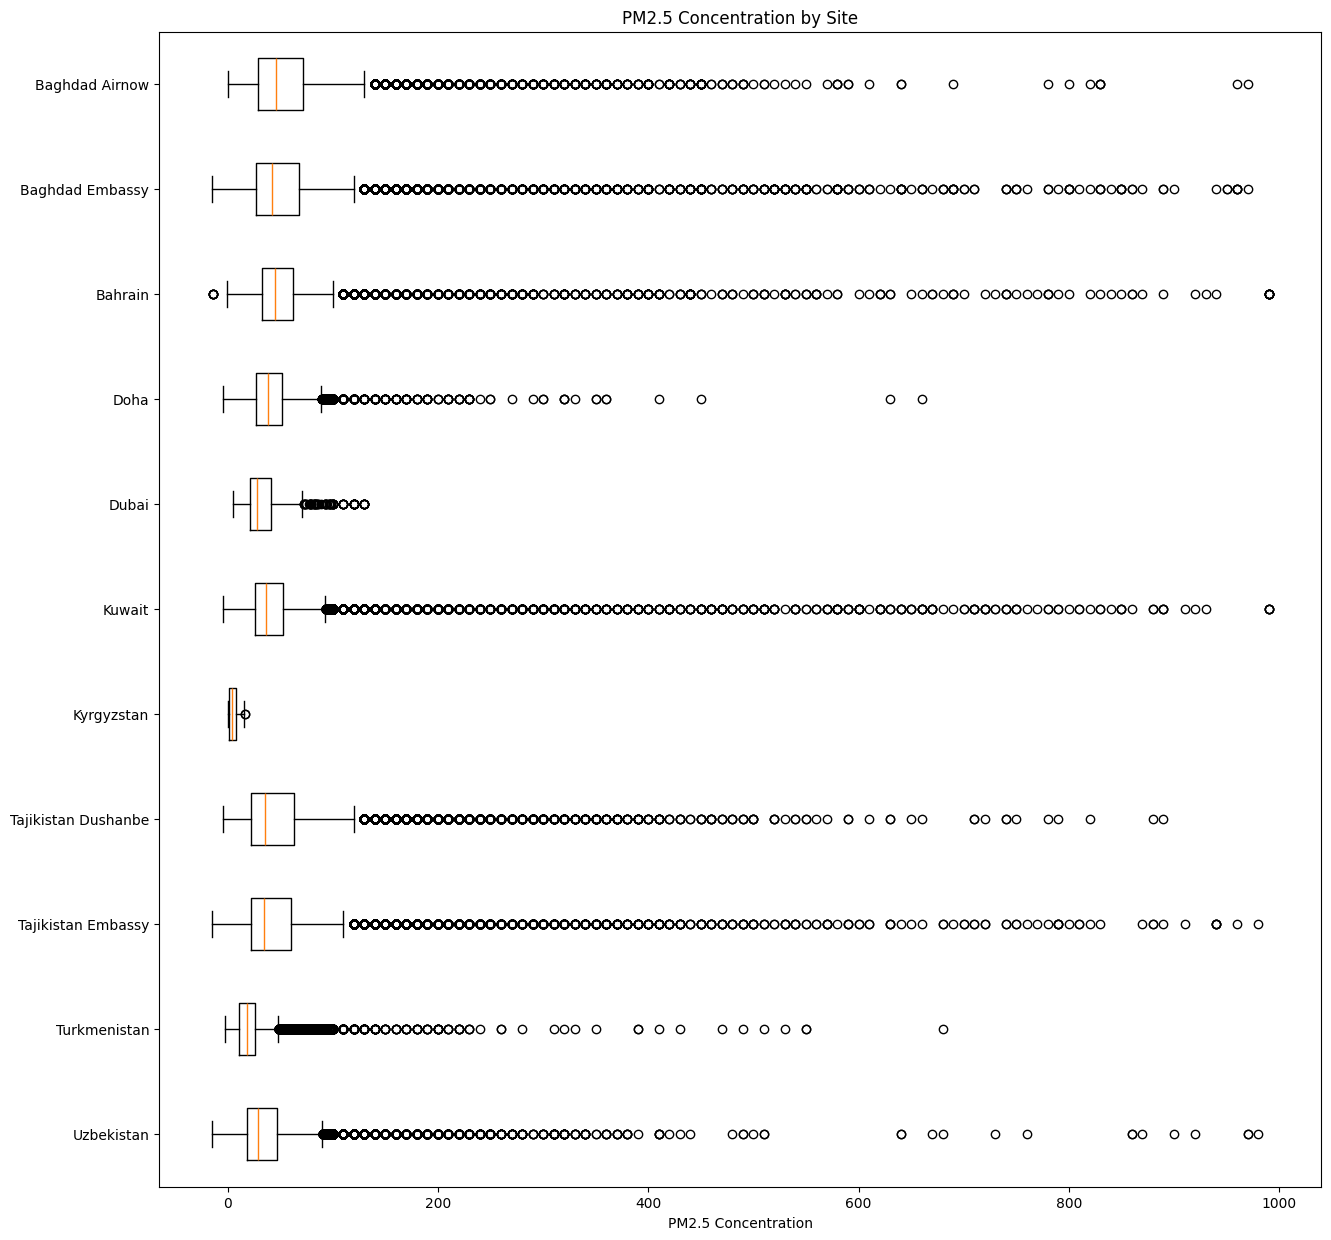

In [36]:
sites = df['site_name'].unique()[::-1]  # Reverse the order of sites

plt.figure(figsize=(15, 15))

for i, site in enumerate(sites):
    site_pm25 = df[df['site_name'] == site]['openaq_pm25']

    plt.boxplot(site_pm25, positions=[i], widths=0.5, vert=False)

plt.yticks(range(len(sites)), sites)
plt.title('PM2.5 Concentration by Site')
plt.xlabel('PM2.5 Concentration')
plt.show()